# **KELOMPOK 3**
1. Benedicta Yesika M
2. Editha Anggrieniputri Kinbenu 
3. Husna Rahma Yunita
4. James Julius
5. Rafida Alaiyya Hayin

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.random import set_seed

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datalaprakuas/covid.csv


In [2]:
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [3]:
df = pd.read_csv('../input/datalaprakuas/covid.csv')

In [4]:
df.head()

,date,new_cases
0,3/2/2020,2
1,3/3/2020,0
2,3/4/2020,0
3,3/5/2020,0
4,3/6/2020,2


In [5]:
df.tail()

,date,new_cases
615,11/7/2021,444
616,11/8/2021,244
617,11/9/2021,434
618,11/10/2021,480
619,11/11/2021,435


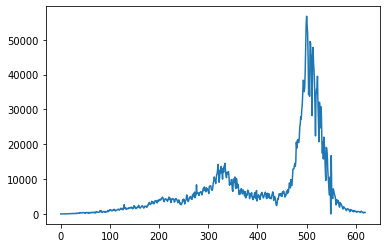

In [6]:
plt.plot(df['new_cases'])

In [7]:
df1=df['new_cases']

In [8]:
df1.head()

0    2
1    0
2    0
3    0
4    2
Name: new_cases, dtype: int64

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
#splitting data menjadi data train dan data test
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:]
time_train = df.iloc[:training_size,0]
time_valid = df.iloc[training_size:,0]

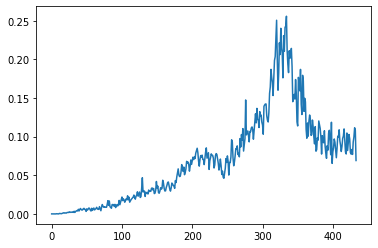

In [11]:
plt.plot(train_data)

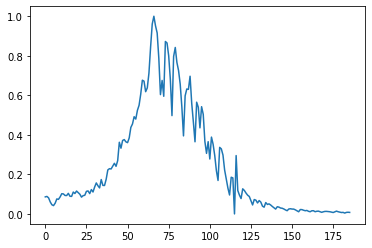

In [12]:
plt.plot(test_data)

In [13]:
training_size, test_size

(434, 186)

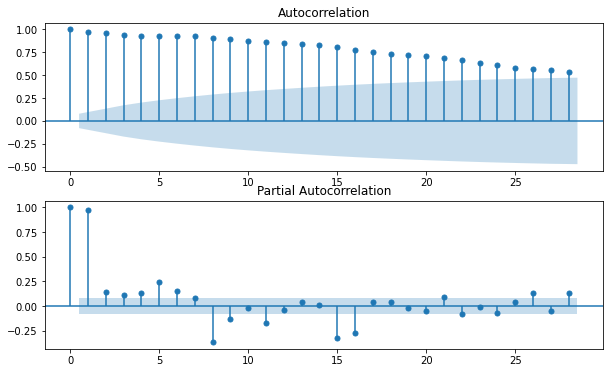

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0]=plot_acf(df.iloc[:,1],ax=ax[0])
ax[1]=plot_pacf(df.iloc[:,1],ax=ax[1])

In [15]:
#Mengubah array menjadi data matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-11):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step=3
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(Y_train.shape)

(420, 3)
(420,)


(None, None)

In [18]:
#reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **LSTM**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
np.random.seed(123)
set_seed(123)

2022-10-28 05:14:08.209971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:14:08.336246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:14:08.337047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:14:08.338414: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41,311
Trainable params: 41,311
Non-trainable params: 0
_________________________________________________________________


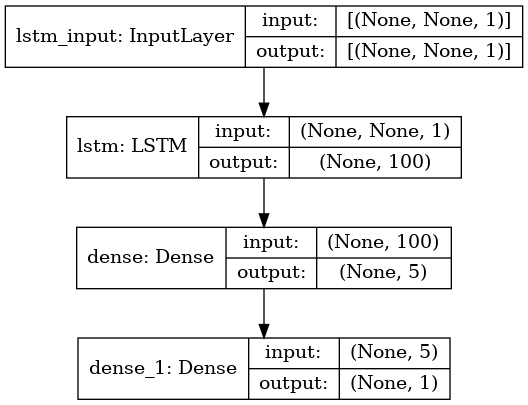

In [21]:
model = Sequential()
model.add(LSTM(100, input_shape=(None,1)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='LSTM model.png', show_shapes=True)

In [22]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=25, batch_size=64, verbose=1)

2022-10-28 05:14:12.443786: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-10-28 05:14:14.659828: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6/6 [==============================] - 4s 91ms/step - loss: 0.0072 - mae: 0.0616 - mse: 0.0072 - val_loss: 0.0057 - val_mae: 0.0743 - val_mse: 0.0057
Epoch 2/25
6/6 [==============================] - 0s 10ms/step - loss: 0.0051 - mae: 0.0509 - mse: 0.0051 - val_loss: 0.0028 - val_mae: 0.0516 - val_mse: 0.0028
Epoch 3/25
6/6 [==============================] - 0s 7ms/step - loss: 0.0034 - mae: 0.0442 - mse: 0.0034 - val_loss: 8.4542e-04 - val_mae: 0.0262 - val_mse: 8.4542e-04
Epoch 4/25
6/6 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0439 - mse: 0.0029 - val_loss: 1.8927e-04 - val_mae: 0.0113 - val_mse: 1.8927e-04
Epoch 5/25
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0455 - mse: 0.0028 - val_loss: 1.8680e-04 - val_mae: 0.0112 - val_mse: 1.8680e-04
Epoch 6/25
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0420 - mse: 0.0025 - val_loss: 3.4417e-04 - val_mae: 0.0154 - val_mse: 3.4417e-04
Epoch 7/25
6/6 [=

<Figure size 432x288 with 0 Axes>

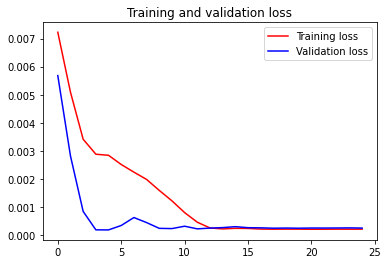

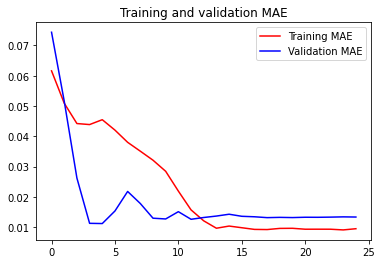

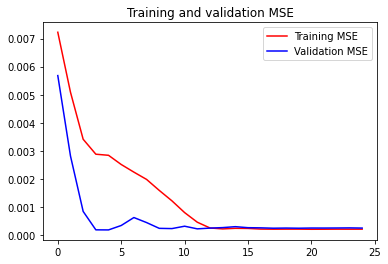

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mae']
val_mae=history.history['val_mae']
mse=history.history['mse']
val_mse=history.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [24]:
test_predict = model.predict(X_test)

In [25]:
test_predict1 = scaler.inverse_transform(test_predict)

In [26]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test, test_predict))

0.08659576275184169

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


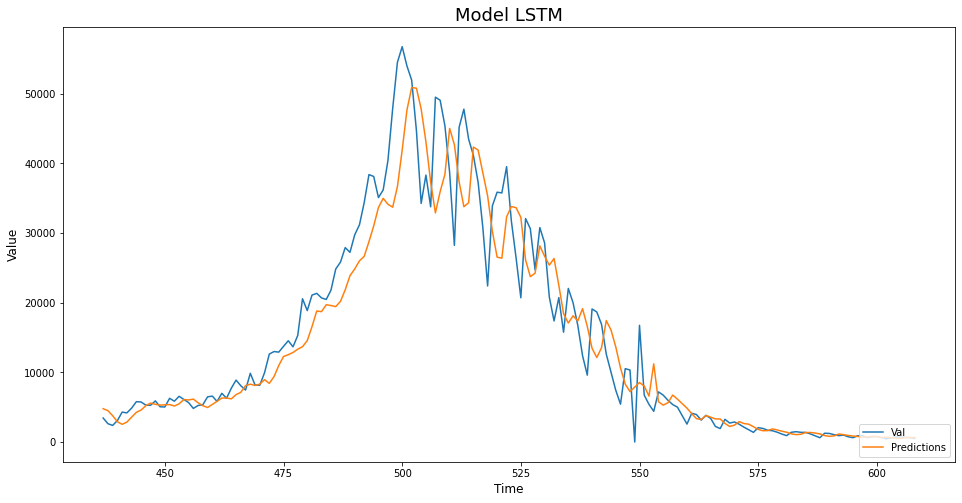

In [27]:
train = df[:training_size+3]
valid = df[training_size+3:len(df1)-11]
valid['Predictions'] = test_predict1
plt.figure(figsize=(16,8))
plt.title('Model LSTM', fontsize=18)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.plot(valid[['new_cases', 'Predictions']])
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
#Simpan model
model.save("LSTM Time Series.h5")